In [1]:
from IPython.display import Image

## Seaborn: statistical data visualization
Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

https://seaborn.pydata.org/#

To import and render graphs in the Jupyter Lab notebook enter the following lines:

In [2]:
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
sns.set(style="darkgrid")

Also import the ```dfply``` library to load the builtin ```diamonds``` dataset

In [5]:
from dfply import *

## Distribution Plots

When dealing with a set of data, often the first thing you’ll want to do is get a sense for how the variables are distributed. This segment of the workshop will give a brief introduction to some of the tools in Seaborn for examining univariate and bivariate distributions. 

### Context of the dataset

This classic dataset contains the prices and other attributes of almost 54,000 diamonds. It's a great dataset for beginners learning to work with data analysis and visualization.
Content

* ```price``` price in US dollars (\$326--\$18,823)
* ```carat``` weight of the diamond (0.2--5.01)
* ```cut``` quality of the cut (Fair, Good, Very Good, Premium, Ideal)
* ```color``` diamond colour, from J (worst) to D (best)
* ```clarity``` a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
* ```x``` length in mm (0--10.74)
* ```y``` width in mm (0--58.9)
* ```z``` depth in mm (0--31.8)
* ```depth``` total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
* ```table``` width of top of diamond relative to widest point (43--95)

In [6]:
diamonds >> head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

### Histogram

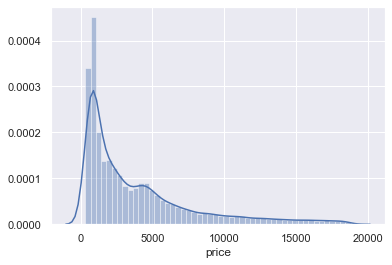

In [10]:
sns.distplot(diamonds['price'])

### Joint Plot
This plot is used for bivariate comparison of data

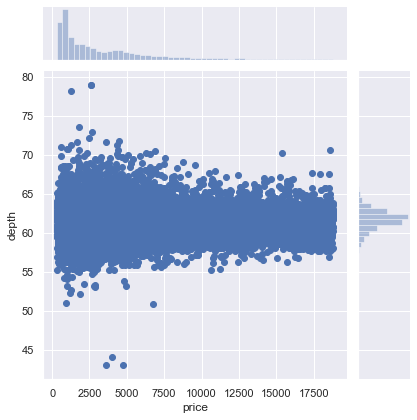

In [11]:
sns.jointplot('price','depth', data= diamonds)

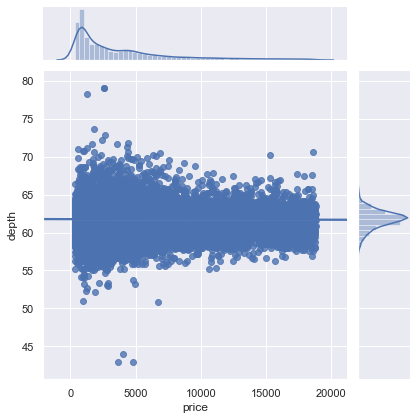

In [12]:
sns.jointplot('price','depth', data= diamonds, kind='reg')

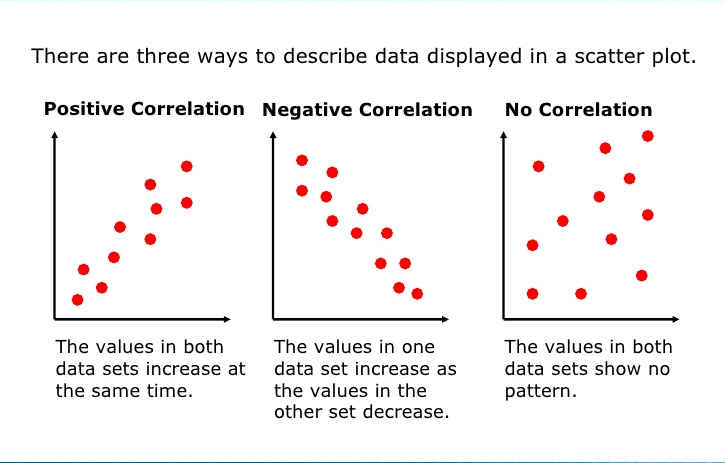

In [13]:
Image(filename='../images/scatterplot.png') 

### Pairplot
Visualize pairwise relationships across all variables in a dataframe

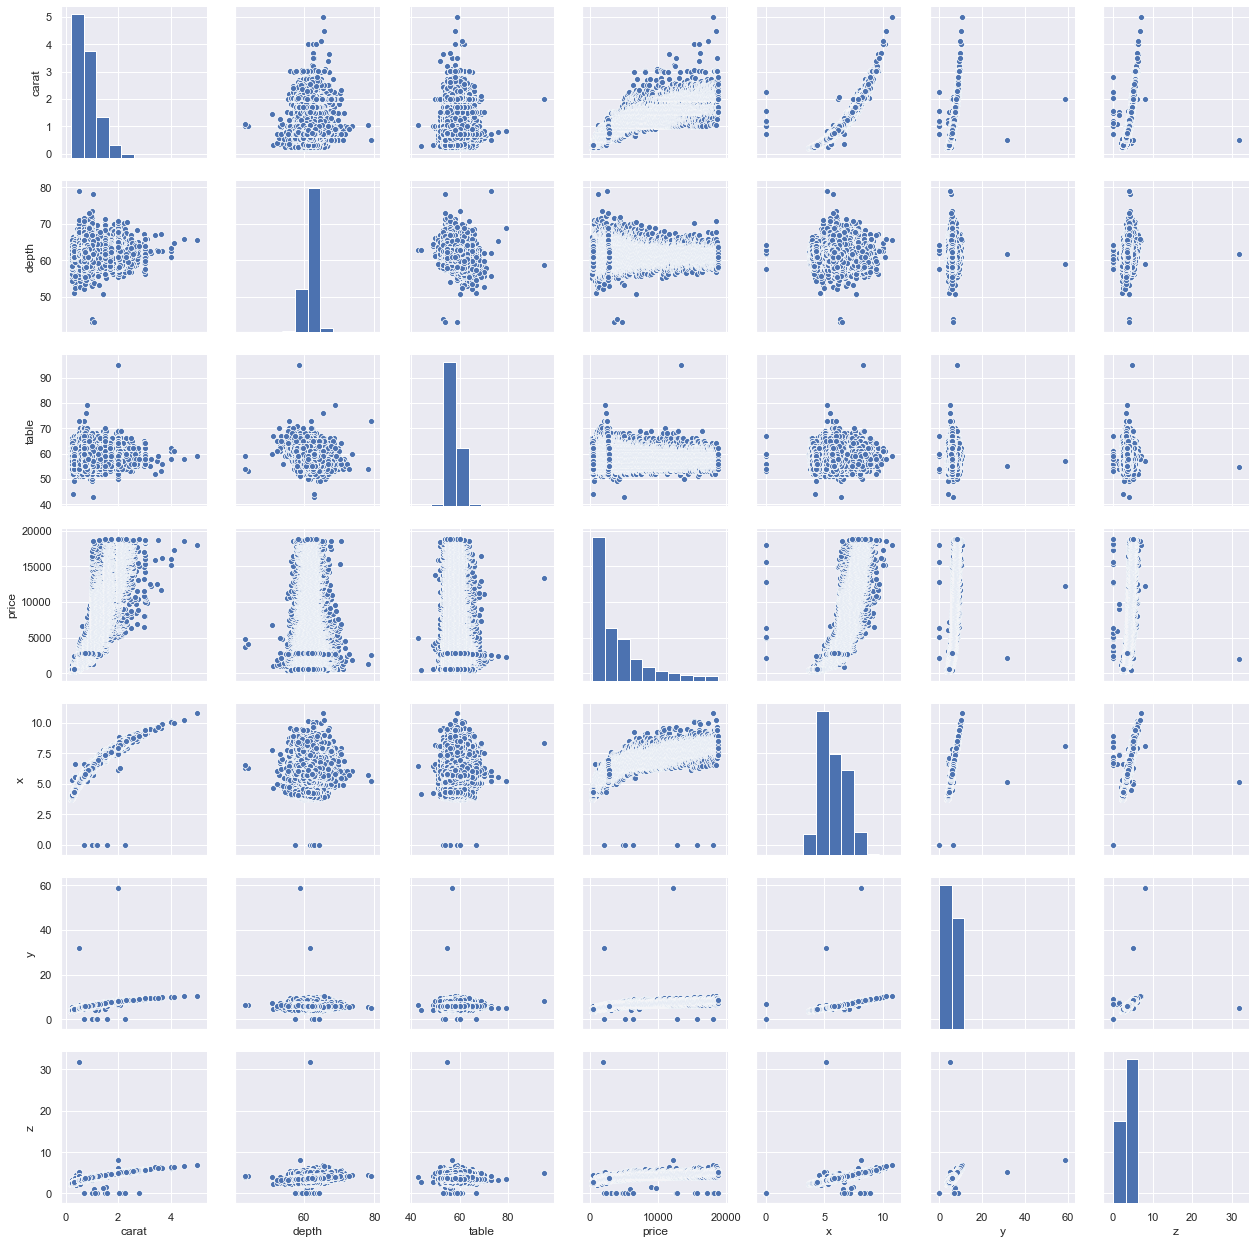

In [14]:
sns.pairplot(diamonds)

Pass in a `hue` parameter to define a categorical variable to be used in the pairplot

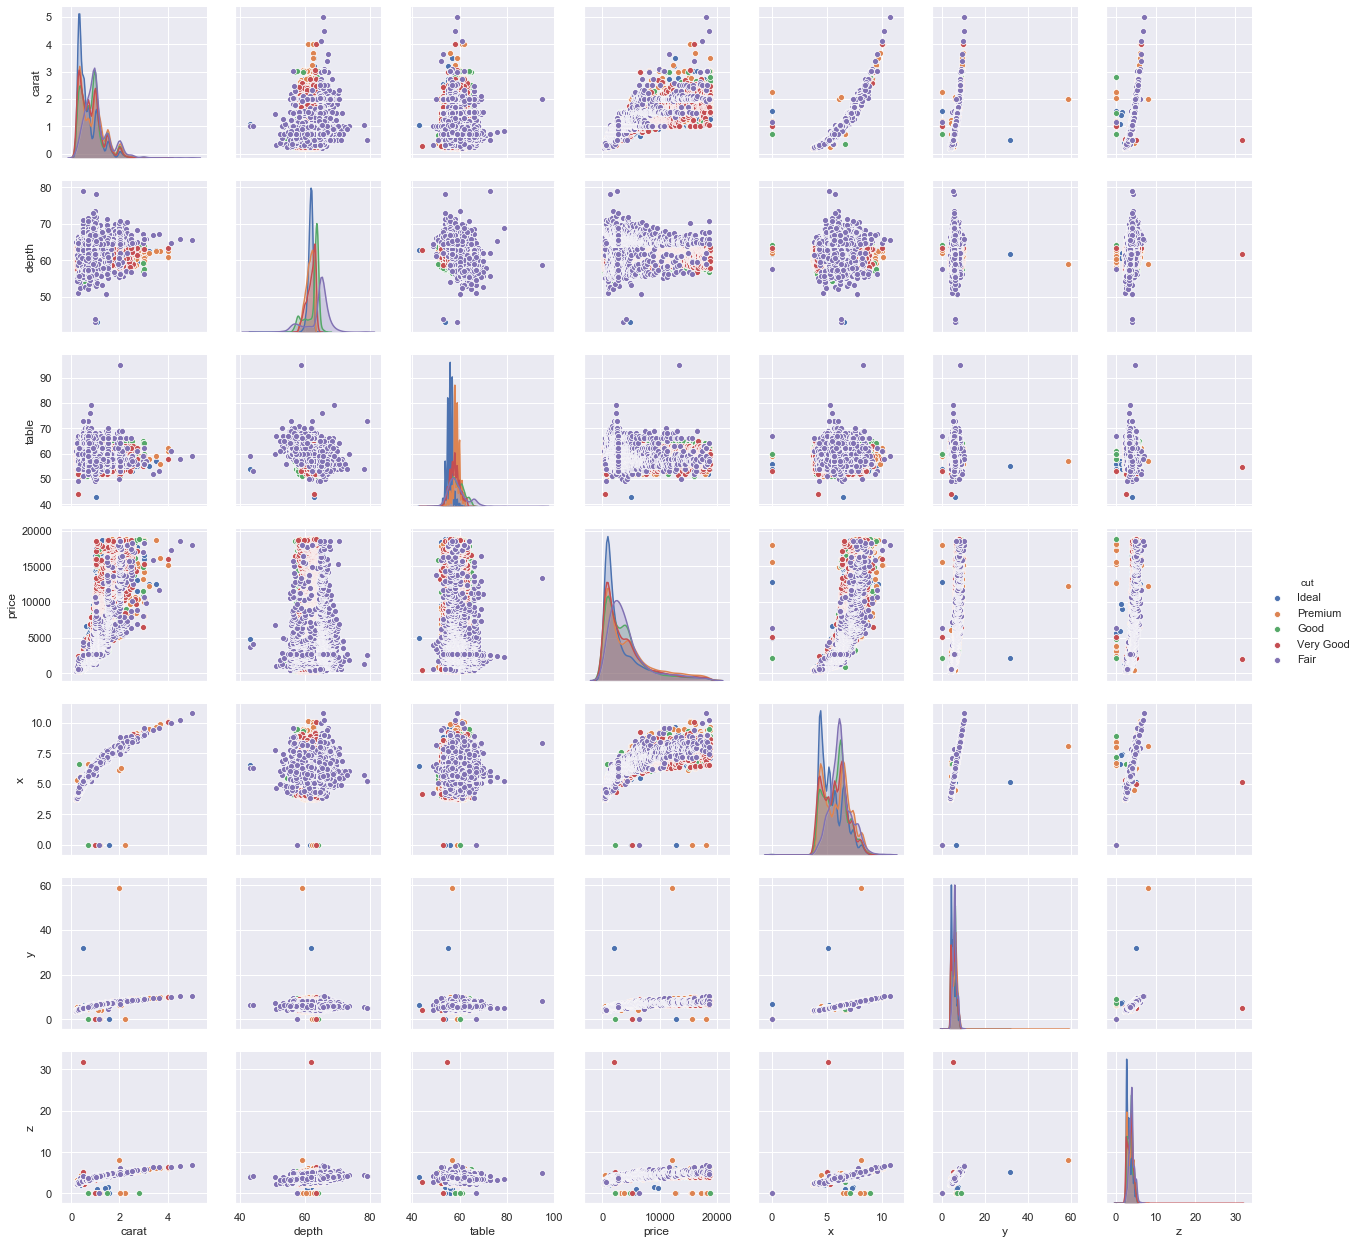

In [15]:
sns.pairplot(diamonds, hue='cut')

### Categorical Plots
These plots are used to visualize variables which are divided into discrete groups

#### Barplot

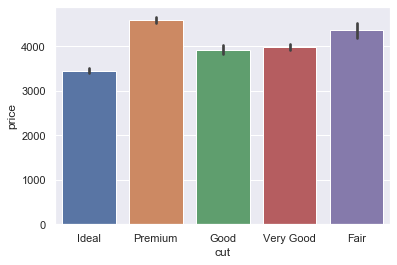

In [16]:
sns.barplot(x= 'cut', y='price', data=diamonds)

#### Countplot
A plot similar to a barplot in which the estimator function explicitly counts the number of occurences of each categorical variable

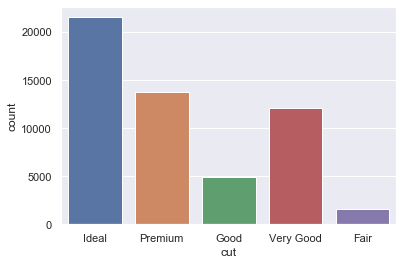

In [17]:
sns.countplot(x='cut', data= diamonds)

### Boxplot
Is a standardized way of displaying the distribution of data based on the five number summary: **minimum**, **first quartile**, **median**, **third quartile**, and **maximum**.

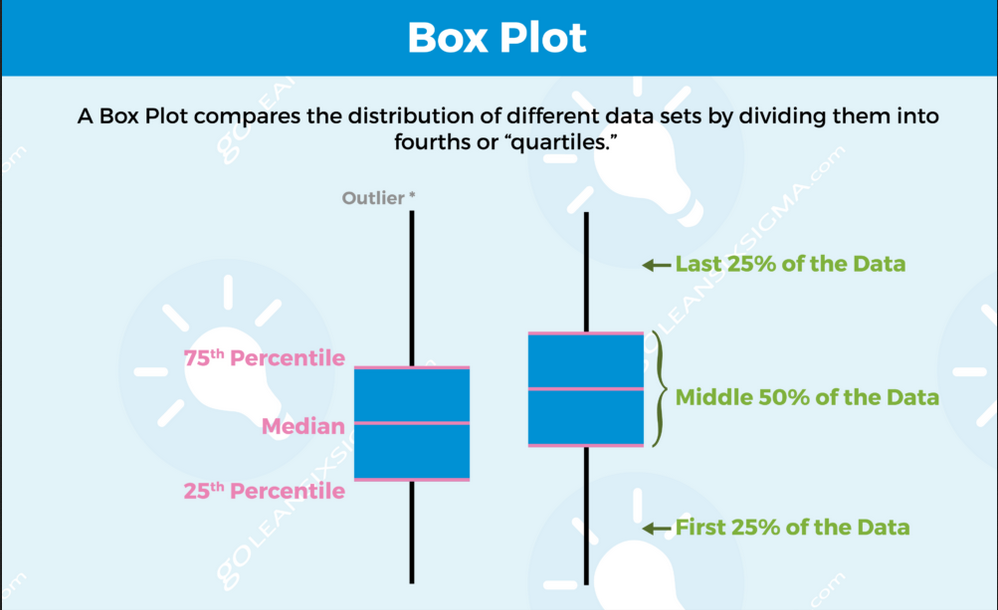

In [18]:
Image(filename='../images/boxplot.png') 

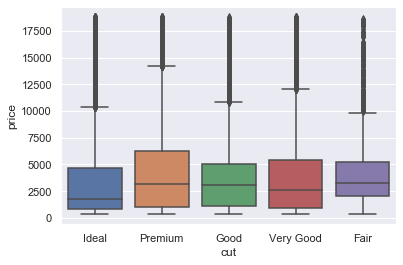

In [19]:
sns.boxplot(x='cut', y='price', data=diamonds)

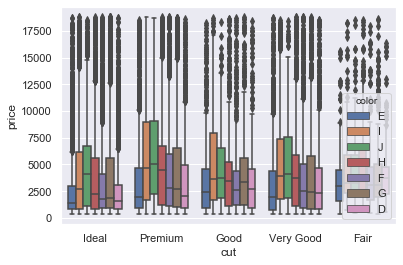

In [20]:
sns.boxplot(x='cut', y='price', data=diamonds, hue='color')

### Strip Plot
A strip plot is a graphical data anlysis technique for summarizing a univariate data set

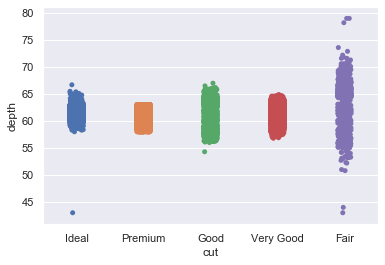

In [21]:
sns.stripplot(x='cut', y='depth', data=diamonds)

To fix the display of closely rendered instances of data use the `jitter` parameter and set to True

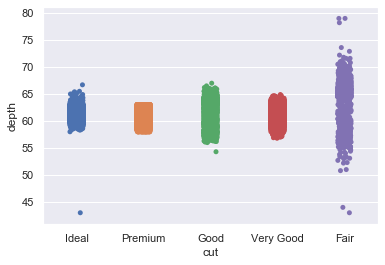

In [22]:
sns.stripplot(x='cut', y='depth', data=diamonds, jitter=True)

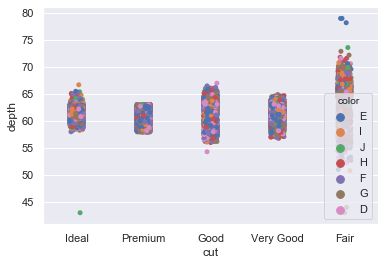

In [42]:
sns.stripplot(x='cut', y='depth', data=diamonds, hue='color')

### Matrix Plots
Dataframes to be plotted in matrix visualizations need to be converted into a matrix format via `pivot_table()` or `corr()` function in Pandas 

In [44]:
diamonds >> head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

In [45]:
diamonds_corr= diamonds.corr()
diamonds_corr

carat     depth     table     price         x         y         z
carat  1.000000  0.028224  0.181618  0.921591  0.975094  0.951722  0.953387
depth  0.028224  1.000000 -0.295779 -0.010647 -0.025289 -0.029341  0.094924
table  0.181618 -0.295779  1.000000  0.127134  0.195344  0.183760  0.150929
price  0.921591 -0.010647  0.127134  1.000000  0.884435  0.865421  0.861249
x      0.975094 -0.025289  0.195344  0.884435  1.000000  0.974701  0.970772
y      0.951722 -0.029341  0.183760  0.865421  0.974701  1.000000  0.952006
z      0.953387  0.094924  0.150929  0.861249  0.970772  0.952006  1.000000

### Heatmap
A heatmap is a graphical representation of data that uses a system of color-coding to represent different values.

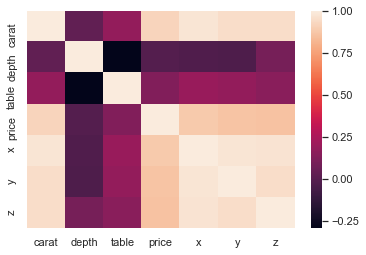

In [46]:
sns.heatmap(diamonds_corr)

Passing an *annotation* parameter in the `sns.heatmap()`

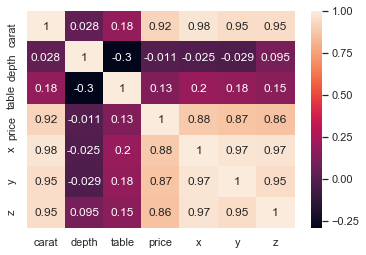

In [47]:
sns.heatmap(diamonds_corr, annot=True)

Another way of converting regular dataframes into matrix form is through pivot tables. In this example the `cut` column will be used as the index

In [48]:
diamonds_matrix= diamonds.pivot_table(index='cut', columns='color', values='price')
diamonds_matrix

color                D            E            F            G            H  \
cut                                                                          
Fair       4291.061350  3682.312500  3827.003205  4239.254777  5135.683168   
Good       3405.382175  3423.644159  3495.750275  4123.482204  4276.254986   
Ideal      2629.094566  2597.550090  3374.939362  3720.706388  3889.334831   
Premium    3631.292576  3538.914420  4324.890176  4500.742134  5216.706780   
Very Good  3470.467284  3214.652083  3778.820240  3872.753806  4535.390351   

color                I            J  
cut                                  
Fair       4685.445714  4975.655462  
Good       5078.532567  4574.172638  
Ideal      4451.970377  4918.186384  
Premium    5946.180672  6294.591584  
Very Good  5255.879568  5103.513274

In [ ]:
sns.heatmap(diamonds_matrix, cmap='RdBu_r')

In [24]:
titanic_df = pd.read_csv('../dataset/titanic.csv')
titanic_df >> head(3)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S

In [32]:
titanic_df['Sex'] = pd.Categorical(titanic_df.Sex)

In [33]:
survived = titanic_df[(titanic_df['Survived'] == 1)]
survived

PassengerId  Survived  Pclass  \
1              2         1       1   
2              3         1       3   
3              4         1       1   
8              9         1       3   
9             10         1       2   
..           ...       ...     ...   
875          876         1       3   
879          880         1       1   
880          881         1       2   
887          888         1       1   
889          890         1       1   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                  Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   
..                                                 ...     ...   ...    ...   
875                   Najib, Miss. Adele Kiamie "Jane"  female  15.0      0   
879      Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)  female  56.0      0   
880       Shelley, Mrs. William (Imanita Parrish Hall)  female  25.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
889                              Behr, Mr. Karl Howell    male  26.0      0   

     Parch            Ticket     Fare Cabin Embarked  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
8        2            347742  11.1333   NaN        S  
9        0            237736  30.0708   NaN        C  
..     ...               ...      ...   ...      ...  
875      0              2667   7.2250   NaN        C  
879      1             11767  83.1583   C50        C  
880      1            230433  26.0000   NaN        S  
887      0            112053  30.0000   B42        S  
889      0            111369  30.0000  C148        C  

[342 rows x 12 columns]

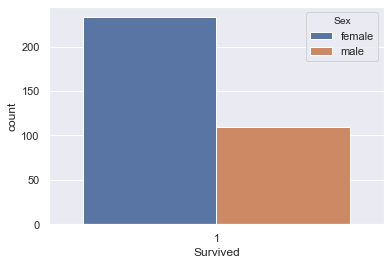

In [36]:
sns.countplot(x='Survived', data= survived, hue='Sex')

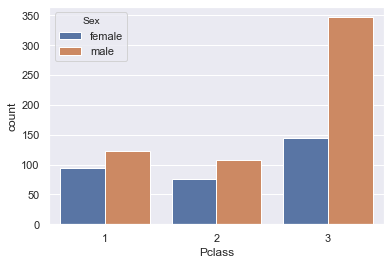

In [37]:
sns.countplot(x='Pclass', data= titanic_df, hue='Sex')

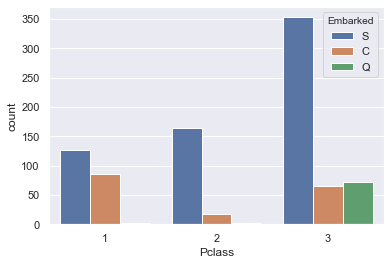

In [41]:
sns.countplot(x='Pclass', data= titanic_df, hue='Embarked')

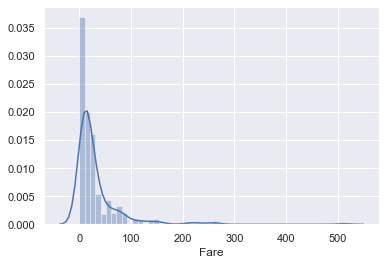

In [62]:
sns.distplot(titanic_df['Fare'])

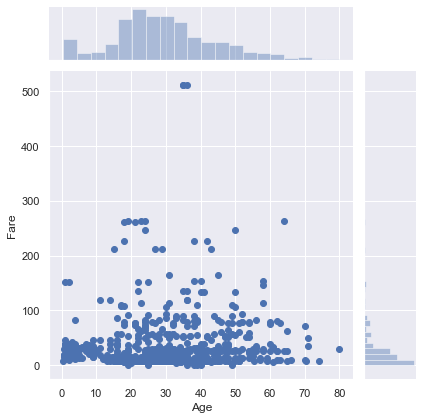

In [51]:
sns.jointplot('Age','Fare', data= titanic_df)

/home/n00b/miniconda3/envs/ds-training-ece/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/n00b/miniconda3/envs/ds-training-ece/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


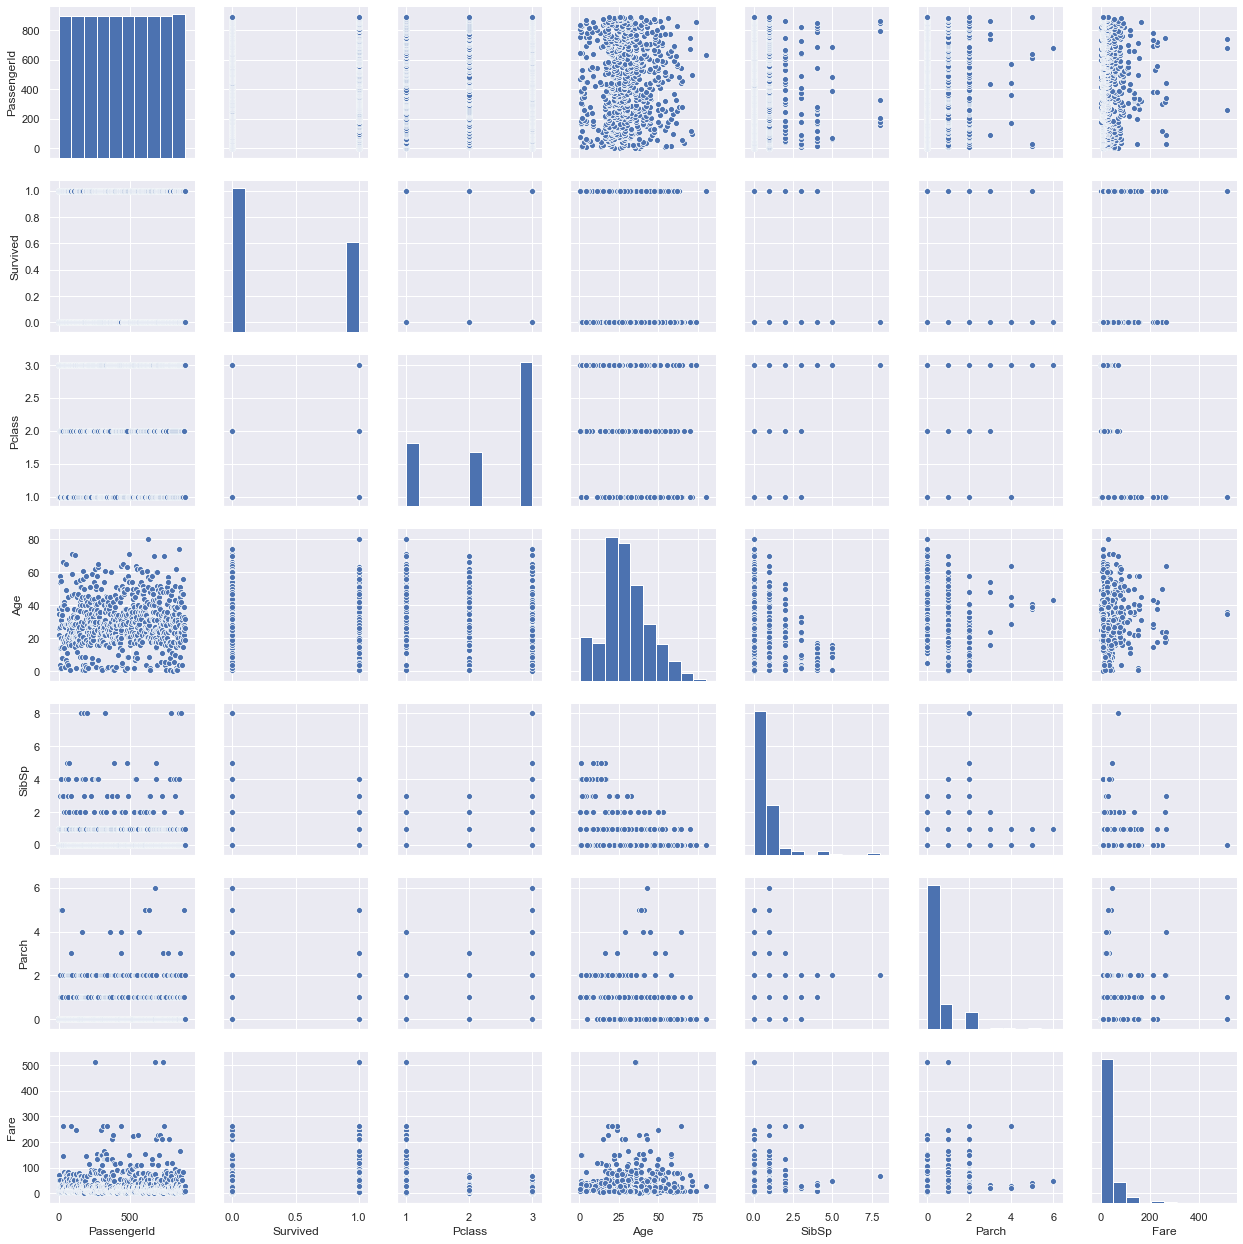

In [54]:
sns.pairplot(titanic_df)

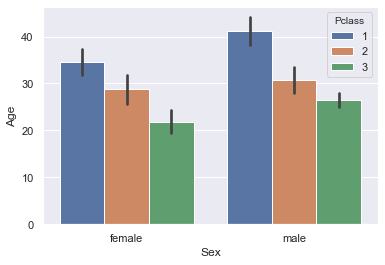

In [56]:
sns.barplot(x= 'Sex', y='Age', data=titanic_df, hue='Pclass')

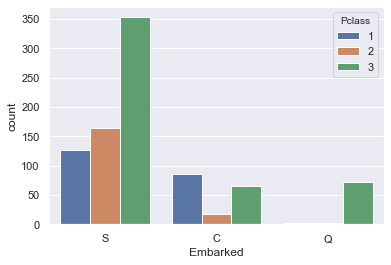

In [57]:
sns.countplot(x='Embarked', data= titanic_df, hue='Pclass')

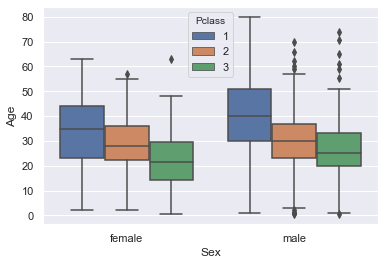

In [59]:
sns.boxplot(x='Sex', y='Age', data=titanic_df, hue='Pclass')